## Stock Market Analysis Project

OF E-COMMERCE COMPANIES

We'll be analyzing stock data related of Walmart, Target and Costco, from Jan 1 2018 to Jan 1 2019. 

### Part 0: Import

** Import the various libraries **

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

____
## Part 1: Getting the Data

### Walmart Stock (Ticker: WMT)

** Use pandas_datareader to obtain the historical stock information for Walmart from Jan 1, 2018 to Jan 1, 2019.**



In [38]:
import pandas_datareader
import datetime

In [39]:
import pandas_datareader.data as web

In [40]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2019,1,1)

In [41]:
walmart = web.DataReader('WMT', data_source ='iex',start = start, end = end)

In [42]:
walmart.tail()

,open,high,low,close,volume
date,,,,,
2018-12-24,86.54,87.565,85.780,85.82,6110310
2018-12-26,86.42,90.420,86.300,90.41,10028292
2018-12-27,89.75,91.610,88.440,91.59,9881506
2018-12-28,92.07,93.470,91.645,92.13,9873973
2018-12-31,92.67,93.390,92.250,93.15,7006026


### Other E-Commerce Companies

** Repeat the same steps to grab data for Target (TSS) and Costco (COST) **

In [7]:
target = web.DataReader('TSS', data_source ='iex',start = start, end = end)
costco = web.DataReader('COST', data_source ='iex',start = start, end = end)

In [8]:
target.tail()

,open,high,low,close,volume
date,,,,,
2018-12-24,76.47,77.49,75.65,75.71,646213
2018-12-26,76.21,79.35,75.58,79.35,1207909
2018-12-27,77.92,80.63,77.46,80.61,1257643
2018-12-28,81.20,81.43,79.43,80.36,823073
2018-12-31,80.71,81.64,80.05,81.29,989034


In [9]:
costco.tail()

,open,high,low,close,volume
date,,,,,
2018-12-24,193.90,195.3272,189.80,189.99,2031705
2018-12-26,190.82,198.7800,189.51,198.63,3268831
2018-12-27,196.96,201.1300,193.96,201.08,2705884
2018-12-28,201.82,204.9500,199.59,202.04,2037917
2018-12-31,203.38,204.3900,201.38,203.71,1729647


## Part 2: Visualizing the Data

** Time to visualize the data. **


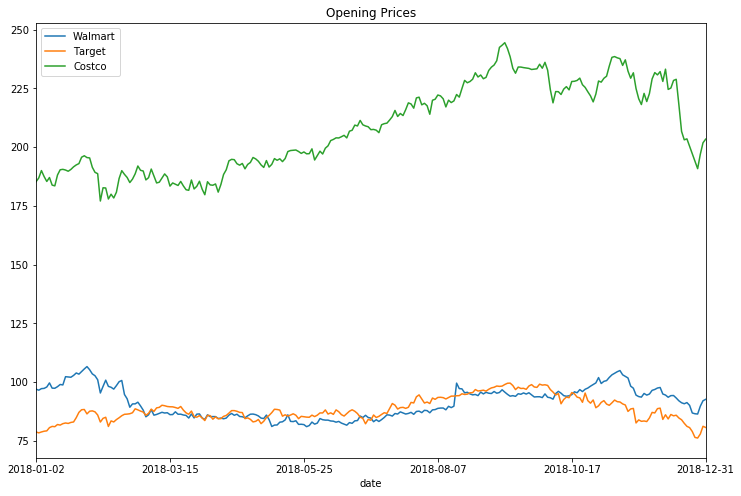

In [44]:
walmart['open'].plot(label = 'Walmart', figsize=(12,8), title= 'Opening Prices')
target['open'].plot(label = 'Target')
costco['open'].plot(label = 'Costco')
plt.legend();

____

** Plot the Volume of stock traded each day.**

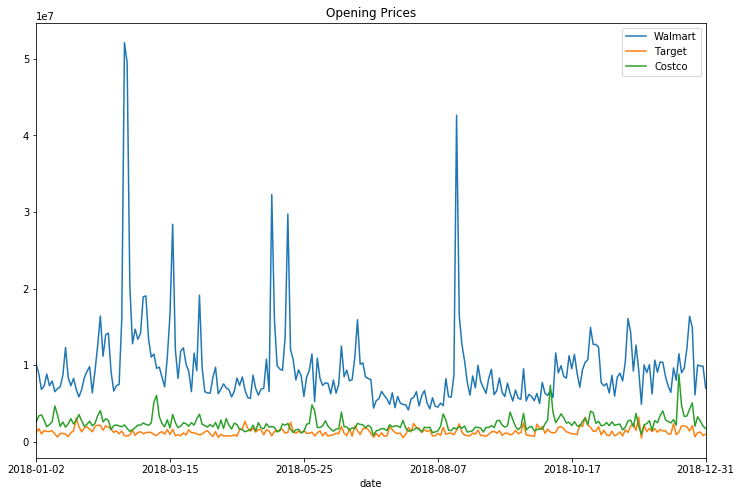

In [45]:
walmart['volume'].plot(label = 'Walmart', figsize=(12,8), title= 'Opening Prices')
target['volume'].plot(label = 'Target')
costco['volume'].plot(label = 'Costco')
plt.legend();

** Interesting, looks like Walmart had a really big spike somewhere in February 2018. What was the date of this maximum trading volume for Ford?**

** What happened that day? **

In [20]:
walmart['volume'].max()

52088475

In [13]:
walmart['volume'].argmax()

'2018-02-20'

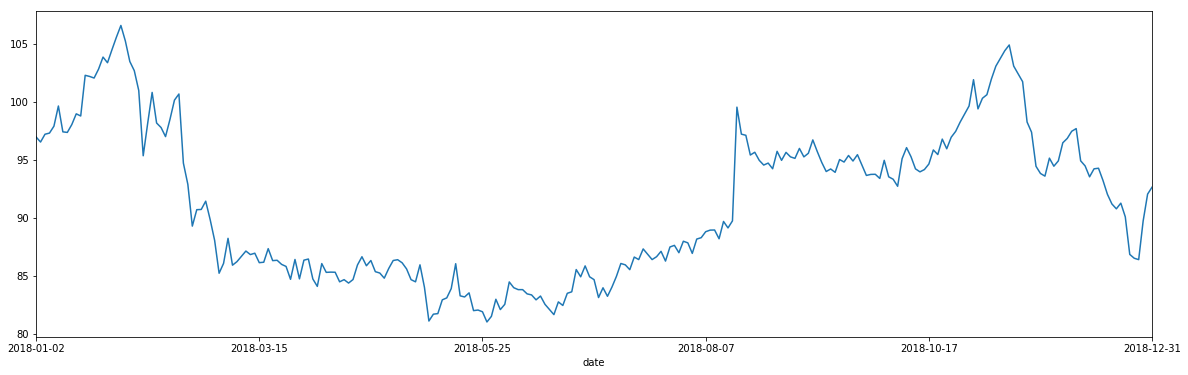

In [46]:
walmart['open'].plot(figsize=(20,6));

____

** The Open Price Time Series Visualization makes Walmart look like its always been much more valuable as a company than Target and Costco. But to really understand this we would need to look at the total market cap of the company, not just the stock price. 

** Each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [104]:
walmart['Total Traded'] = walmart['open'] * walmart['volume']
target['Total Traded'] = target['open'] * target['volume']
costco['Total Traded'] = costco['open'] * costco['volume']

** Plot this "Total Traded" against the time index.**

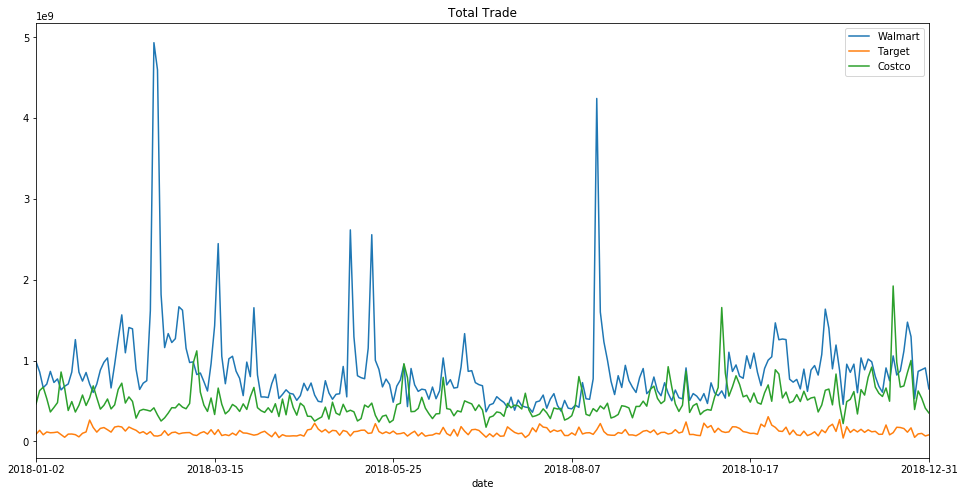

In [48]:
walmart['Total Traded'].plot(label='Walmart', figsize=(16,8), title="Total Trade")
target['Total Traded'].plot(label='Target')
costco['Total Traded'].plot(label='Costco')
plt.legend();

** Interesting, looks like there was huge amount of money traded for Walmart somewhere in early 2018. What date was that and what happened? **

In [49]:
walmart['Total Traded'].max()

4934924627.6700001

In [50]:
walmart['Total Traded'].argmax()

'2018-02-20'

____

** Plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for Walmart. **

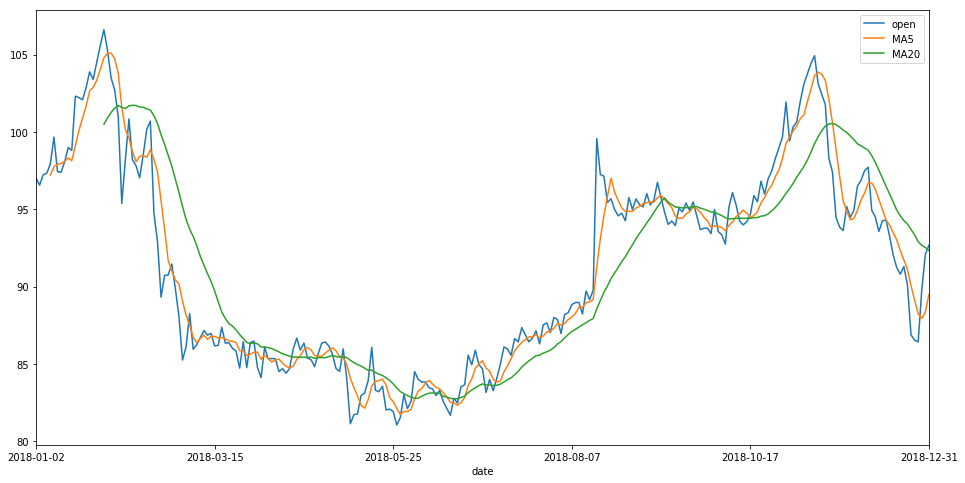

In [51]:
walmart['MA5'] = walmart['open'].rolling(5).mean()
walmart['MA20'] = walmart['open'].rolling(20).mean()
walmart[['open', 'MA5', 'MA20']].plot(figsize=(16,8));

______

In [52]:
from pandas.plotting import scatter_matrix

In [53]:
market_comp = pd.concat([walmart['open'], target['open'], costco['open']], axis=1)

In [54]:
market_comp.columns = ['Walmart Open', 'Target Open', 'Costco Open']

In [55]:
market_comp.head()

,Walmart Open,Target Open,Costco Open
date,,,
2018-01-02,96.9976,78.8018,185.2859
2018-01-03,96.5581,78.4042,186.8594
2018-01-04,97.2321,78.7919,190.0064
2018-01-05,97.3298,79.1101,187.4631
2018-01-08,97.9256,79.2592,185.3750


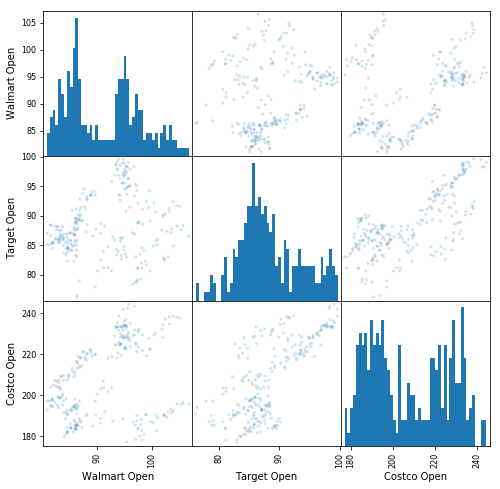

In [37]:
scatter_matrix(market_comp, figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

In [74]:
walmart['returns'] = (walmart['close'] / walmart['close'].shift(1)) - 1

In [78]:
walmart['returns'] = (walmart['close']).pct_change(1)

In [79]:
walmart['returns'].head()

date
2018-01-02         NaN
2018-01-03    0.008723
2018-01-04    0.000905
2018-01-05    0.005927
2018-01-08    0.014781
Name: returns, dtype: float64

In [80]:
target['returns'] = (target['close']).pct_change(1)

In [81]:
target['returns'].head()

date
2018-01-02         NaN
2018-01-03    0.003822
2018-01-04    0.008124
2018-01-05    0.006548
2018-01-08    0.015012
Name: returns, dtype: float64

In [82]:
costco['returns'] = (costco['close']).pct_change(1)

In [83]:
costco['returns'].head()

date
2018-01-02         NaN
2018-01-03    0.012001
2018-01-04   -0.007766
2018-01-05   -0.007139
2018-01-08    0.003888
Name: returns, dtype: float64

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

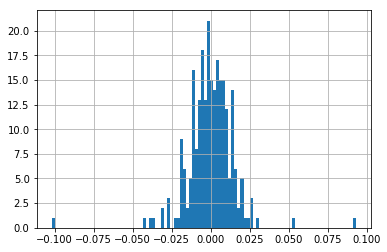

In [84]:
walmart['returns'].hist(bins=100);

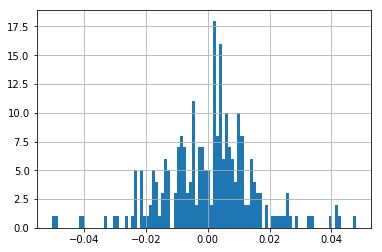

In [85]:
target['returns'].hist(bins=100);

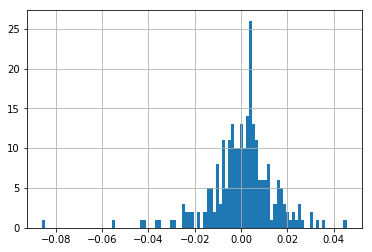

In [86]:
costco['returns'].hist(bins=100);

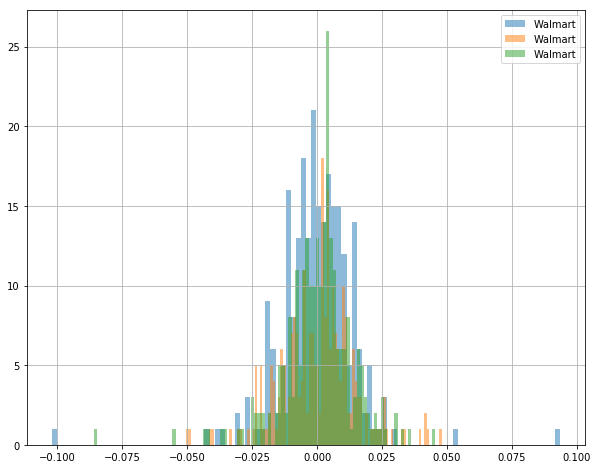

In [90]:
walmart['returns'].hist(bins=100, label='Walmart', figsize=(10,8), alpha=0.5)
target['returns'].hist(bins=100, label='Target', figsize=(10,8), alpha=0.5)
costco['returns'].hist(bins=100, label='Costco', figsize=(10,8), alpha=0.5)
plt.legend();

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

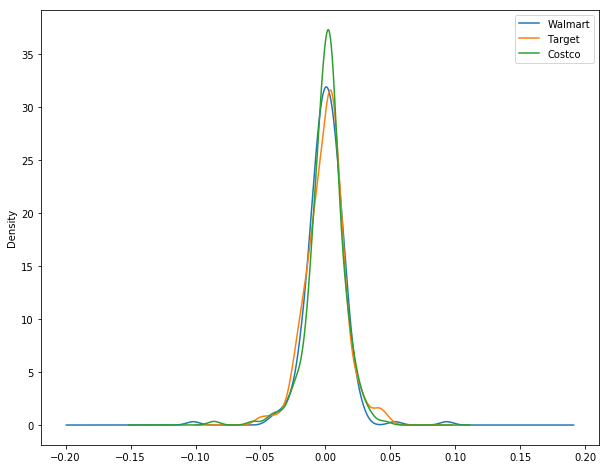

In [92]:
walmart['returns'].plot(kind='kde', label='Walmart', figsize=(10,8))
target['returns'].plot(kind='kde', label='Target', figsize=(10,8))
costco['returns'].plot(kind='kde', label='Costco', figsize=(10,8))
plt.legend();

** Try also creating some box plots comparing the returns. **

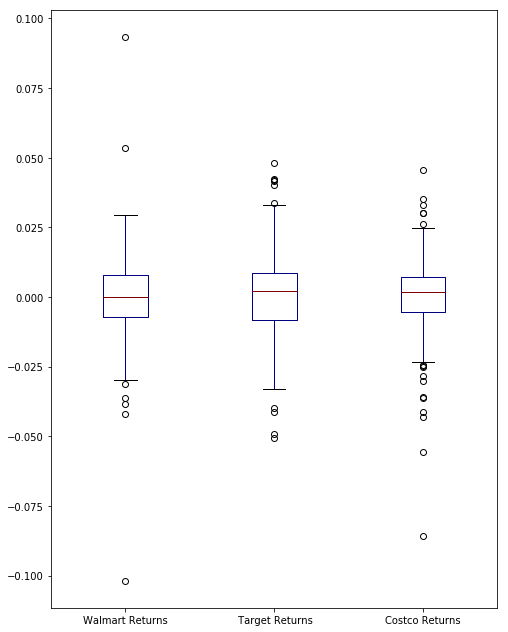

In [93]:
box_df = pd.concat([walmart['returns'],target['returns'],costco['returns']],axis=1)
box_df.columns = ['Walmart Returns',' Target Returns','Costco Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet');

## Comparing Daily Returns between Stocks


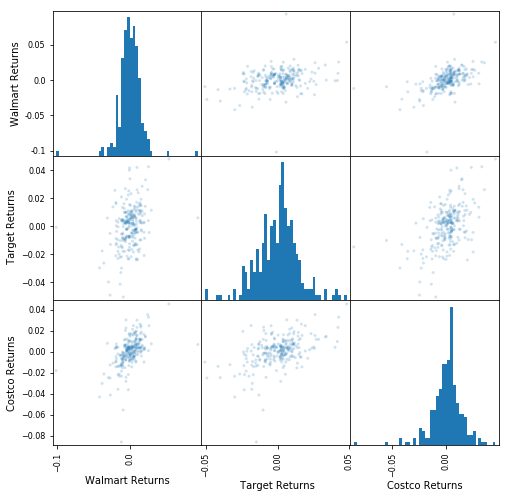

In [94]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

____
## Cumulative Daily Returns


The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [99]:
walmart['Cumulative Return'] = (1 + walmart['returns']).cumprod()

In [100]:
walmart.head()

,open,high,low,close,volume,Total Traded,MA5,MA20,returns,Cumulative Return
date,,,,,,,,,,
2018-01-02,96.9976,97.4763,96.2357,96.3041,10150490,9.845732e+08,NaN,NaN,NaN,NaN
2018-01-03,96.5581,97.6814,96.4799,97.1442,8903576,8.597124e+08,NaN,NaN,0.008723,1.008723
2018-01-04,97.2321,97.4665,96.6177,97.2321,6830407,6.641348e+08,NaN,NaN,0.000905,1.009636
2018-01-05,97.3298,98.0526,97.3005,97.8084,7283990,7.089493e+08,NaN,NaN,0.005927,1.015620
2018-01-08,97.9256,99.3908,97.8865,99.2541,8843872,8.660415e+08,97.20864,NaN,0.014781,1.030632


In [101]:
target['Cumulative Return'] = (1 + target['returns']).cumprod()
costco['Cumulative Return'] = (1 + costco['returns']).cumprod()

** Let's plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

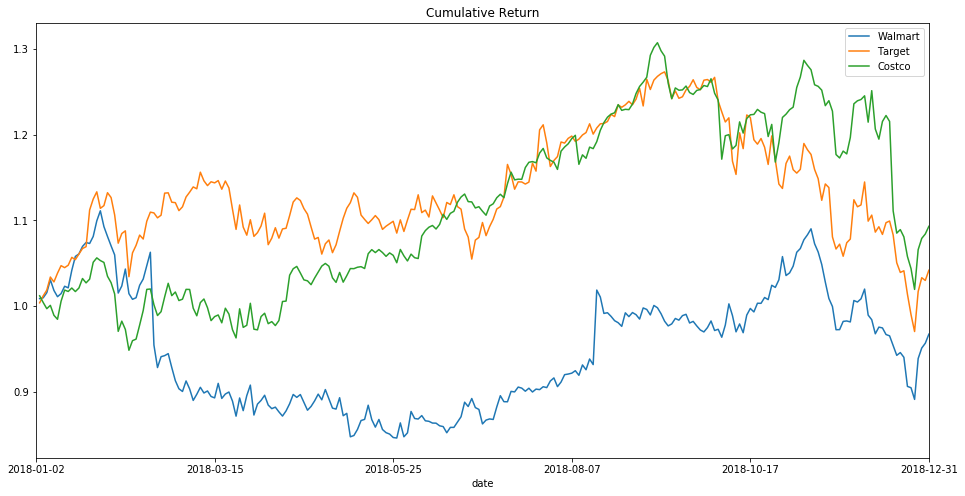

In [103]:
walmart['Cumulative Return'].plot(label='Walmart',figsize=(16,8),title='Cumulative Return')
target['Cumulative Return'].plot(label='Target')
costco['Cumulative Return'].plot(label='Costco')
plt.legend();

# The End!